In [5]:
%load_ext autoreload
%autoreload 2

import healpy as hp
import numpy as np
from astropy.io import fits
from pixell import enmap, enplot, utils, reproject, curvedsky

import sys
import os
project_root = os.path.abspath("..")
sys.path.append(project_root)
from assets import act_car as act
from assets import make_galaxy_map as mgm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading cls and plotting

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plot_left = 5
plot_right = 5
ggpath = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/gg_results.txt'

gg = np.loadtxt(ggpath,skiprows=1)
print(gg.shape)

yypath = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/cibdbeta_yy_results.txt'

yy = np.loadtxt(yypath,skiprows=1)
print(yy.shape)

(122, 2)
(122, 2)


In [7]:
ells, beam = act.read_beam()
print(beam.shape)

(20000,)


## Results of gy in other articles

In [arXiv:2206.05689v2](https://arxiv.org/abs/2206.05689), (Cross Correlation between thermal Sunyaev-Zel’dovich effect and projected galaxy density field)

The clyy from planck tsz is shown in ayo_gg and ayo_yy:

In [8]:
path_AYO = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/AYODEJI_etal/cl.png.csv'

cl_AYO = np.loadtxt(path_AYO,delimiter=',',skiprows=1)
print(cl_AYO.shape)

ell_AYO = cl_AYO[:,0]
cl_AYO_yy = cl_AYO[:,1]/1e16
cl_AYO_gg = cl_AYO[:,5]/1e4
print(cl_AYO_yy)

(19, 10)
[3.91571e-16 3.94016e-16 3.41793e-16 3.20770e-16 1.84170e-16 1.11424e-16
 7.95110e-17 5.54030e-17 4.49360e-17 3.92110e-17 3.24960e-17 2.44930e-17
 2.08620e-17 1.80250e-17 1.52640e-17 1.36140e-17 1.22210e-17 1.15730e-17
 1.25890e-17]


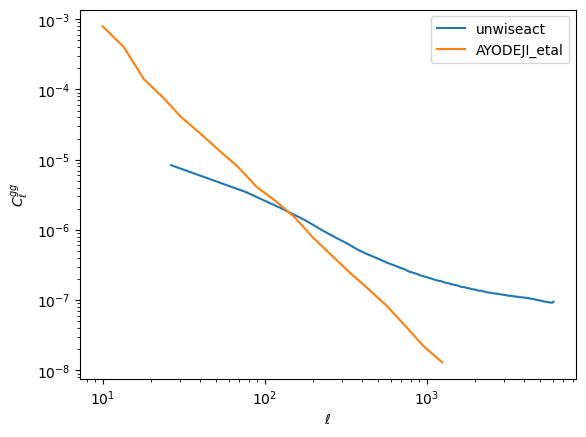

In [10]:
ells = gg[:,0]
clgg = gg[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, clgg,label = 'unwiseact')
plt.plot(ell_AYO,cl_AYO_gg,label='AYODEJI_etal')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{gg}$')
plt.legend()

In [7]:
# print(yy[:,1])

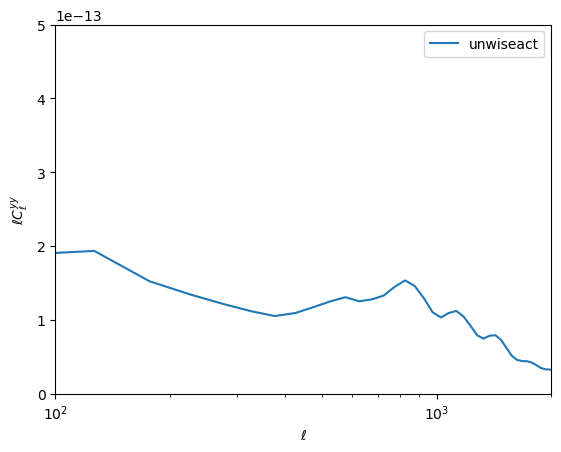

In [9]:
ells = yy[:,0]
clyy = yy[:,1]
plls = ells*(ells+1)/(2*np.pi)

# plot_left = 5
# plot_right = 20
# plt.plot(ell_AYO, cl_AYO_yy,label = 'AYO_et_al')
plt.plot(ells, (ells*clyy),label = 'unwiseact')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.xlim(1e2,2e3)
plt.ylim(0e-14,5e-13)
# plt.ylabel(r'$(\ell+1)\ell C_{\ell}^{yy}/2\pi$')
plt.ylabel(r'$\ell C_{\ell}^{yy}$')
plt.legend()
plt.show()

Comparison with ACT

CIB ($T_{CIB}=10.7, beta = 1.7$)

### The old result using healpix

In [10]:
OUTPATH = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/'

def read_results(path:str):
    # ignore the '#' in the header
    
    data = np.loadtxt(path,skiprows=1)
    header = open(path).readline().strip().split()
    header.remove('#')
    table = {header[i]:data[:,i] for i in range(len(header))}
    return table

In [11]:
table = read_results('/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/healpix/cibdBeta_results_first_sample.txt')
print(table.keys())

dict_keys(['ell', 'cibdBeta_1.0_T_10.7_gy', 'cibdBeta_1.0_T_10.7_yy', 'cibdBeta_1.2_T_10.7_gy', 'cibdBeta_1.2_T_10.7_yy'])


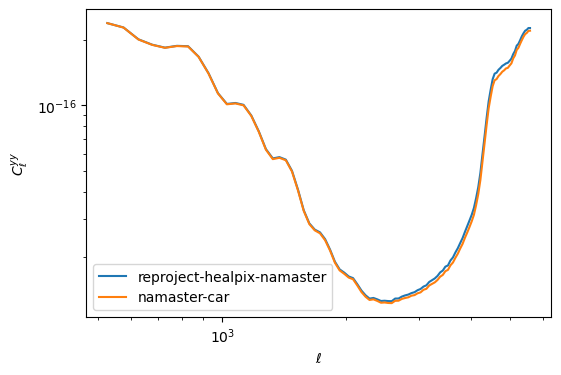

In [9]:
ell = table['ell']
pll = ell*(ell+1)/(2*np.pi) # Power spectrum normalization

def infer_params_from_string(s):
    parts = s.split('_')
    beta = float(parts[1])
    T = float(parts[3])
    return beta, T

plot_left = 10
plot_right = 10
fig,ax = plt.subplots(1,1, figsize=(6,4))
# for models in table.keys():
#     if models == 'ell':
#         continue
#     if '_gy' in models:
#         continue   
#     beta, T = infer_params_from_string(models)
#     print('beta =', beta, 'T =', T)
#     data = table[models]
#     # hp.write_cl('cibdBeta_cl_beta{:.2f}_T{:.2f}.fits'.format(beta, T), data/pll)


model = 'cibdBeta_1.0_T_10.7_yy'
data = table[model]
ax.plot(ell[plot_left:-plot_right], (data)[plot_left:-plot_right], label='reproject-healpix-namaster')

ells = yy[:,0]
clyy = yy[:,1]
plls = ells*(ells+1)/(2*np.pi)

ax.plot(ells[plot_left:-plot_right], clyy[plot_left:-plot_right],label = 'namaster-car')

# ax.plot(ell[plot_left:-plot_right], pll[plot_left:-plot_right]*2e-16, label='l(l+1)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell^{yy}$')
ax.legend()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plot_left = 5
plot_right = 5
ggpath = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/gg_results.txt'

gg = np.loadtxt(ggpath,skiprows=1)
print(gg.shape)

yy_cib_cibdbeta_t107_beta17 = np.loadtxt('/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/yy_cib_cibdBeta_T10.7_beta1.7.txt')
print(yy_cib_cibdbeta_t107_beta17.shape)

yy_cib_cibdbeta_t107_beta14 = np.loadtxt('/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/yy_cib_cibdBeta_T10.7_beta1.4.txt')
print(yy_cib_cibdbeta_t107_beta14.shape)

yy_cib_cibdbeta_t107_beta10 = np.loadtxt('/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/yy_cib_cibdBeta_T10.7_beta1.0.txt')
print(yy_cib_cibdbeta_t107_beta10.shape)





(122, 2)
(122, 2)
(122, 2)
(122, 2)


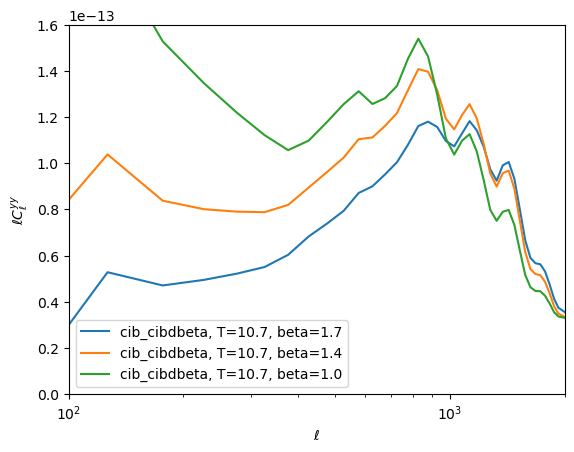

In [17]:
ells = yy_cib_cibdbeta_t107_beta17[:,0]
clyy = yy_cib_cibdbeta_t107_beta17[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, (ells*clyy),label = 'cib_cibdbeta, T=10.7, beta=1.7')

# ells = yy_cib_cibdbeta_t107_beta17[:,0]
# clyy = yy_cib_cibdbeta_t107_beta17[:,1]
# plls = ells*(ells+1)/(2*np.pi)

# plt.plot(ells, (ells*clyy),label = 'cib, T=10.7, beta=1.7')

ells = yy_cib_cibdbeta_t107_beta14[:,0]
clyy = yy_cib_cibdbeta_t107_beta14[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, (ells*clyy),label = 'cib_cibdbeta, T=10.7, beta=1.4')

ells = yy_cib_cibdbeta_t107_beta10[:,0]
clyy = yy_cib_cibdbeta_t107_beta10[:,1]

plt.plot(ells, (ells*clyy),label = 'cib_cibdbeta, T=10.7, beta=1.0')
# plot_left = 5
# plot_right = 20
# plt.plot(ell_AYO, cl_AYO_yy,label = 'AYO_et_al')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.xlim(1e2,2e3)
plt.ylim(0e-14,1.6e-13)
# plt.ylabel(r'$(\ell+1)\ell C_{\ell}^{yy}/2\pi$')
plt.ylabel(r'$\ell C_{\ell}^{yy}$')
plt.legend()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plot_left = 5
plot_right = 5
ggpath = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/gg_results.txt'

gg = np.loadtxt(ggpath,skiprows=1)
print(gg.shape)

yypath_cib_cibdbeta = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/yy_cib_cibdBeta_T10.7_beta1.7.txt'

yy_cib_cibdbeta = np.loadtxt(yypath_cib_cibdbeta,skiprows=1)
print(yy_cib_cibdbeta.shape)

yypath_cib = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/yy_cib_T10.7_beta1.7.txt'

yy_cib = np.loadtxt(yypath_cib,skiprows=1)
print(yy_cib.shape)

yy_path_cib_cibdbeta_cibdt = '/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_results/car/yy_cib_cibdBeta_cibdT_T10.7_beta1.7.txt'

yy_cib_cibdbeta_cibdt = np.loadtxt(yy_path_cib_cibdbeta_cibdt,skiprows=1)
print(yy_cib_cibdbeta_cibdt.shape)


(122, 2)
(122, 2)
(122, 2)
(122, 2)


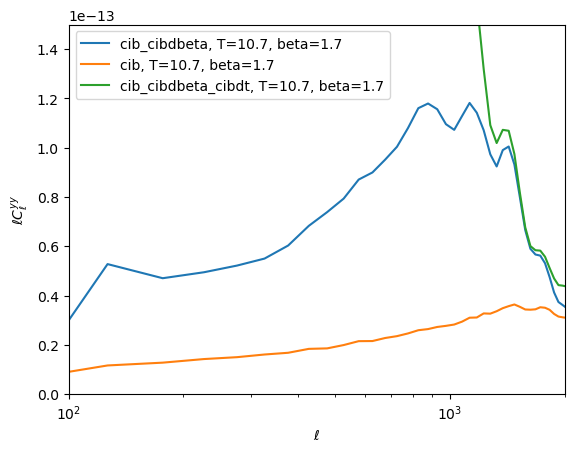

In [15]:
ells = yy_cib_cibdbeta[:,0]
clyy = yy_cib_cibdbeta[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, (ells*clyy),label = 'cib_cibdbeta, T=10.7, beta=1.7')

ells = yy_cib[:,0]
clyy = yy_cib[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, (ells*clyy),label = 'cib, T=10.7, beta=1.7')

ells = yy_cib_cibdbeta_cibdt[:,0]
clyy = yy_cib_cibdbeta_cibdt[:,1]
plls = ells*(ells+1)/(2*np.pi)

plt.plot(ells, (ells*clyy),label = 'cib_cibdbeta_cibdt, T=10.7, beta=1.7')
# plot_left = 5
# plot_right = 20
# plt.plot(ell_AYO, cl_AYO_yy,label = 'AYO_et_al')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.xlim(1e2,2e3)
plt.ylim(0e-14,1.5e-13)
# plt.ylabel(r'$(\ell+1)\ell C_{\ell}^{yy}/2\pi$')
plt.ylabel(r'$\ell C_{\ell}^{yy}$')
plt.legend()
plt.show()

This is the $\ell C_{\ell}^{yy}$ in the orginal ACT article.

their parameters for CIB spectra is:
 β = 1.7 and TCIB = 10.70 K are the parameters characterizing the approximate all-sky CIB modified blackbody SED

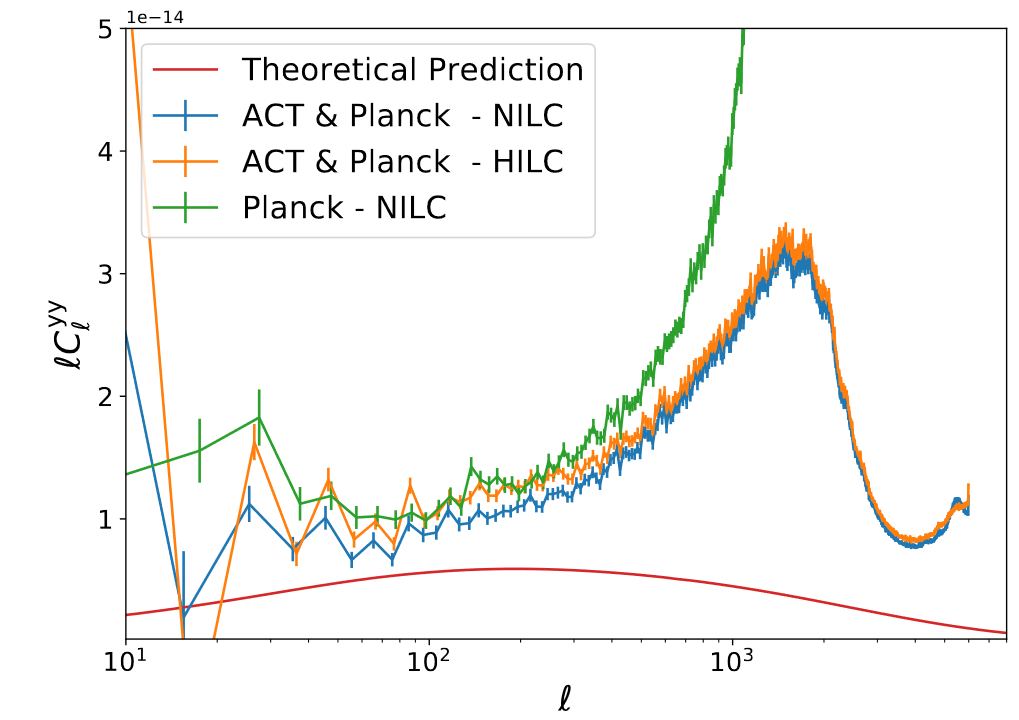
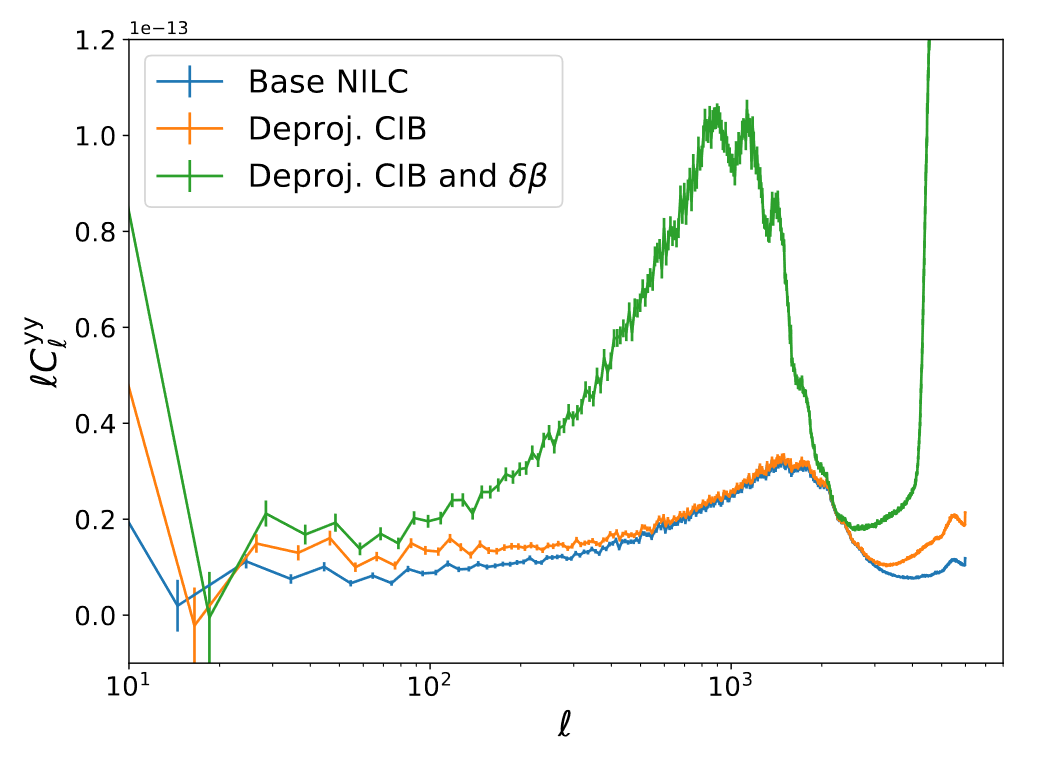

### Error in computing gy

Traceback (most recent call last):
  File "/mnt/c/Users/gdzhao/projects/unwise_sz/unwiseact_car.py", line 75, in <module>
    cl_gy = nmt.compute_full_master(g_field, y_field, b)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/zgd/miniconda3/envs/namaster/lib/python3.11/site-packages/pymaster/workspaces.py", line 574, in compute_full_master
    raise ValueError("Fields must have same resolution")
ValueError: Fields must have same resolution

In [3]:
# codex = act.get_ymap_index_act(verbose=True)
selected_maps = act.get_ymap_index_act_selected(deprotype='cib',beta_range=[1.0,1.1],T_range=[10,12],verbose=True)

selected map object of cib with beta = 1.0, T = 10.7


In [4]:
ymap, wcs = selected_maps[0].read_map_to_array()

In [5]:
mask, wcs = act.read_composite_mask_to_array()

## Severe Memory limit exceeded.

Need computational resources, now!

For the time being, I will downgrade the map by a factor of 2 in ```unwiseact_car.py```

In [6]:
import pymaster as nmt

y_field = nmt.NmtField(mask, [ymap], wcs = wcs, n_iter=0)

: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('ACT CIB map')
plt.imshow(y_field.get_maps()[0], interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()